# 1 建模场景分析

## 1.1 建模目标

客户生命周期管理一直是企业运营的重点关注问题，一般来说，客户粘性随着时间的迁移会经历潜在期、培育期、活跃期、衰退期、睡眠期以及流失期6个阶段。通过对企业运营管理的经验总结，管理学家发现多数行业维护一个客户的成本比获取一个新客户的成本低得多，因此不少企业都会开设客户服务部门对客户流失现象进行分析，以求挽回进入睡眠期和流失期的客户，为企业创造长远价值。

![](./pics/客户生命周期.png)

企业A主要从事运营商业务，为客户提供电话服务、网络服务、付费电视等服务。随着机器学习在推荐系统领域获得的巨大成功，企业A也想构建处这样一个“客户流失推荐”的分析模型，去识别潜在流失客户，并对流失概率的优先级进行排序，帮助客户服务部门合理分配资源进行客户关系维系。


## 1.2 建模数据

此数据集包含21个字段，7044行，总计数据量为154968。数据存在缺失现象。  
数据来源：https://www.kaggle.com/blastchar/telco-customer-churn

特征|说明
-|-
customerID|客户ID
gender|性别：客户是男性还是女性
SeniorCitizen|老年人：客户是否是老年人（是，否）
Partner|配偶：客户是否有配偶（是，否）
Dependents          |家属：客户是否有家属（是、否）
tenure              |期限：客户在公司停留的月数
PhoneService        |电话服务：客户是否有电话服务（是、否）
MultipleLines       |多线路：客户是否有多条线路（是、否、无电话服务）
InternetService     |互联网服务：客户的互联网服务提供商（DSL、光纤、NO）
OnlineSecurity      |在线安全：客户是否有在线安全（是、否、无互联网服务）
OnlineBackup        |在线备份：客户是否有在线备份（是、否、无互联网服务）
DeviceProtection    |设备保护：客户是否有设备保护（是、否、无互联网服务）
TechSupport         |技术支持：客户是否有技术支持（是、否、无互联网服务）
StreamingTV         |流媒体：客户是否有流媒体电视（是、否、无互联网服务）
StreamingMovies     |流式播放：客户是否有流式播放的电影（是、否、无互联网服务）
Contract            |合同：客户的合同期限（月到月、一年、两年）
PaperlessBilling    |无纸记账：客户是否有无纸账单（是，否）
PaymentMethod       |付款方式：客户的付款方式（电子支票、邮寄支票、银行转账（自动）、信用卡（自动））
MonthlyCharges      |月费用：每月向客户收取每月的费用
TotalCharges        |总费用：向客户收取的总金额
Churn               |客户是否流失（是或否）

## 1.3 建模环境

In [131]:
graphviz_path = r'C:\Program Files\Graphviz\bin'

# 2 模型选择

## 2.1 传统的推荐算法模型——协同过滤
推荐系统是一种个性化系统，本质上是一种信息过滤系统，通过一定的算法在海量数据中过滤掉用户不太可能产生行为的物品，从而为用户推荐所需要的物品。

**推荐模型的关系演化图：**


![](./pics/传统推荐模型的关系演化图.png)


协同过滤算法是推荐系统的首选模型，从物品相似度和用户相似角度出发，衍生出了UserCF和ItemCF两种算法。从协同过滤衍生出矩阵分解模型（Matrix Factorization，MF）并发展出矩阵分解的各分支模型。

（1）基于用户的协同过滤算法（UserCF）
UserCF的工作原理是：当一个用户A需要个性化推荐时，先找到和他有相似兴趣度的其他用户，然后把那些用户喜欢的而用户A没有听说过的物品推荐给A。

该算法的实现主要包括两个步骤：

a.和目标用户兴趣度相似的用户集合

b.这个集合中的用户喜欢且目标用户没有听说过的物品推荐给目标用户

UserCF算法的缺点：随着用户增长，计算兴趣相似度矩阵难度越来越高；该算法很难对推荐结果作出解释。

（2）基于物品的协同过滤算法（ItemCF）

ItemCF的工作原理是：给用户推荐那些和他们之前喜欢的物品相似的其他物品。

该算法的实现主要包括两个步骤：

a.物品之间的相似度

b.物品的相似度和用户的历史行为给用户生成推荐列表

UserCF和ItemCF两种算法应用的侧重点不同，UserCF推荐更社会化（新闻），反映用户所在的小型兴趣群体中物品的热门程度；ItemCF推荐更个性化（电商），反映了用户自己的兴趣传承。





## 2.2 GBDT+LR
### 2.2.1 逻辑回归（LR）
逻辑回归是广义线性回归（GLM）的一种特殊形式，逻辑回归建立在0-1分布上，假设概率用函数值域是[0,1]来代替。

**其分布函数和密度函数分别为：**

![](./pics/LR.png)

其中,μ=0 表示位置参数，γ>0 为形状参数。

LR模型的并行能力很强，能够处理较大的数据集，同时只能处理一维的特征，学习能力有限，需要大量的特征工程。

### 2.2.2 梯度提升树（GBDT）
GBDT（Gradient Boost Decision Tree），即梯度提升决策树，由梯度提升（Gradient Boost）和决策树（Decision Tree）两部分组成。 是一种迭代的决策树算法，该算法由多棵决策树组成，所有树的结论累加起来做最终答案，决策树的深度决定了特征交叉的阶数。

由于其树状特性，数据敏感度较高，部分数据的调整会引发整体类别的变化，可处理数据量有限，需要一个相对比较钝化的模型。GBDT缺乏泛化能力，在原有的数据集上添加新的数据集需要重新训练。

In [132]:
#梯度提升决策树算法步骤解释：

#1、初始化，估计使损失函数极小化的常数值，它是只有一个根节点的树，即ganma是一个常数值。

#2、（a）计算损失函数的负梯度在当前模型的值，将它作为残差的估计（b）估计回归树叶节点区域，以拟合残差的近似值（c）利用线性搜索估计叶节点区域的值，使损失函数极小化（d）更新回归树
#3、得到输出的最终模型 f(x)

### 2.2.3 GBDT+LR
GBDT+LR的核心是将GBDT每棵树的决策路径直接作为LR的输入特征使用。GBDT的输出结果作为新数据集训练LR模型，最终得到预测的概率值。
GBDT+LR运行过程

1、GBDT首先对原始训练数据做训练，得到一个二分类器，利用网格搜索寻找最佳参数组合。

2、当GBDT训练好做预测的时候，把模型中的每棵树计算得到的预测概率值所属的叶子结点位置记为1，构造出新的训练数据。

3、新的训练数据构造完成后，与原始的训练数据中的label(输出)数据一并输入到LR分类器中进行最终分类器的训练，LR一层可使用正则化来减少过拟合的风险。

**GBDT+LR组合模型运行示意图：**


![](./pics/GBDT+LR.jpg)

GBDT+LR组合模型推进了特征工程模型化的趋势，GBDT+LR组合模型的提出，意味着特征工程可以完全交由一个独立的模型来完成，模型的输入可以是原始的特征向量，不必在特征工程上投入过多的人工筛选和模型设计的精力，实现真正的端到端的训练。





# 3 建模流程

## 3.1 数据清洗

### 3.1.1 数据导入

数据集一共21个维度,7043个样本，其中,customerID是客户id,最后一列Churn为标签：Yes表示流失，No表示非流失，其他19列是用户相关特征，其中，有4个是数值型特征，15个是离散型特征

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [3]:
data = pd.read_csv("./data/TCC.csv")
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

(7043, 21)

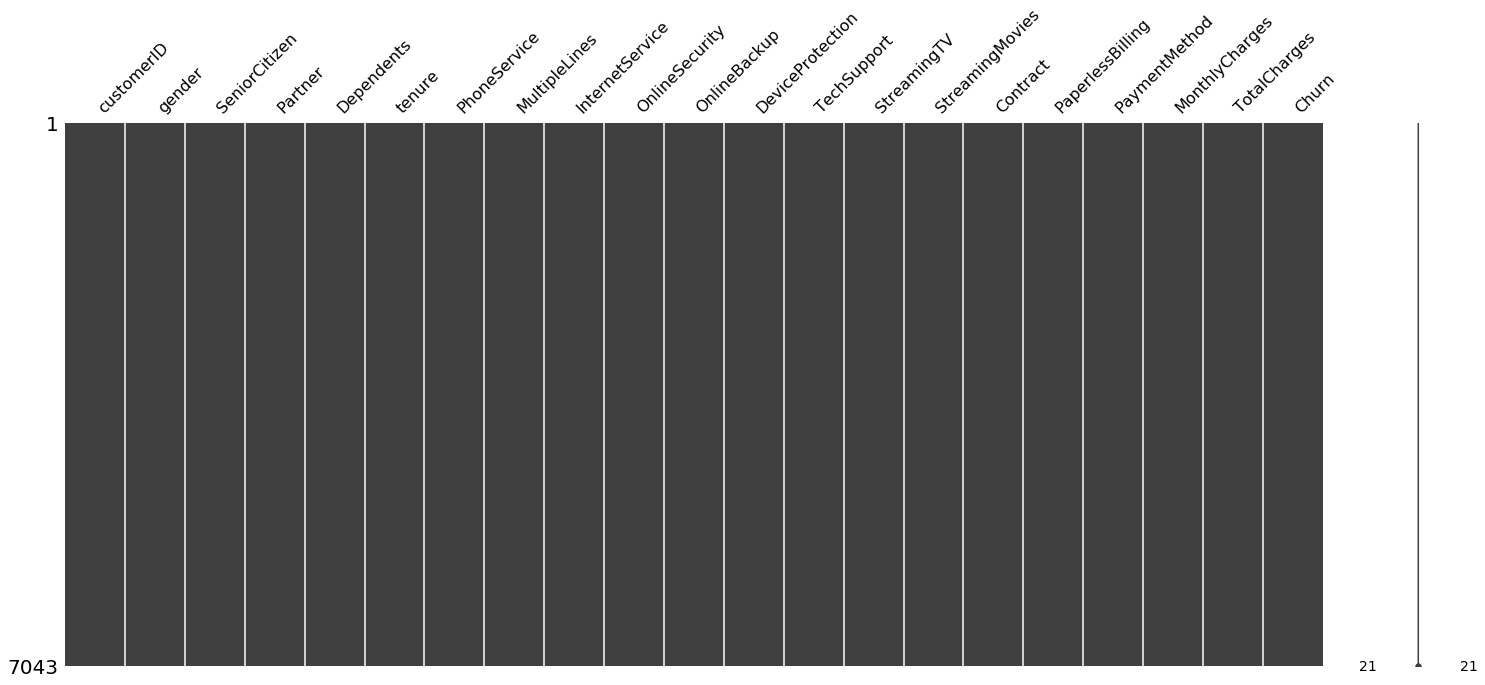

In [4]:
msno.matrix(data)

In [5]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


### 3.1.2 数据统计分析

我们拿掉用户ID和是否流失的标签列之后，对用户的其他特征进行分析，由于很多特征是字符串，所以可以设置describe方法中的include为['object']，以此来显示非数值型的统计结果

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data["Churn"][data["Churn"]=="No"].count()

5174

In [8]:
data["Churn"][data["Churn"]=="Yes"].count()

1869

In [9]:
data["Churn"][data["Churn"]=="No"].groupby(by=data["gender"]).count()

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [10]:
data["Churn"][data["Churn"]=="Yes"].groupby(by=data["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [28]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

<Figure size 432x432 with 0 Axes>

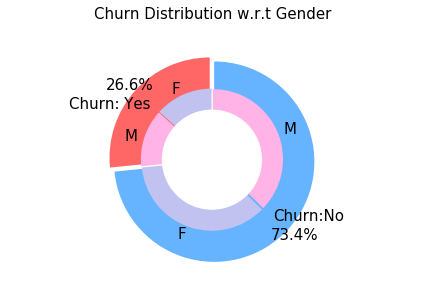

In [29]:
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender', fontsize=15, y=1.1)#基于是否流失下的性别分布图
plt.axis('equal')
plt.tight_layout()
plt.show()

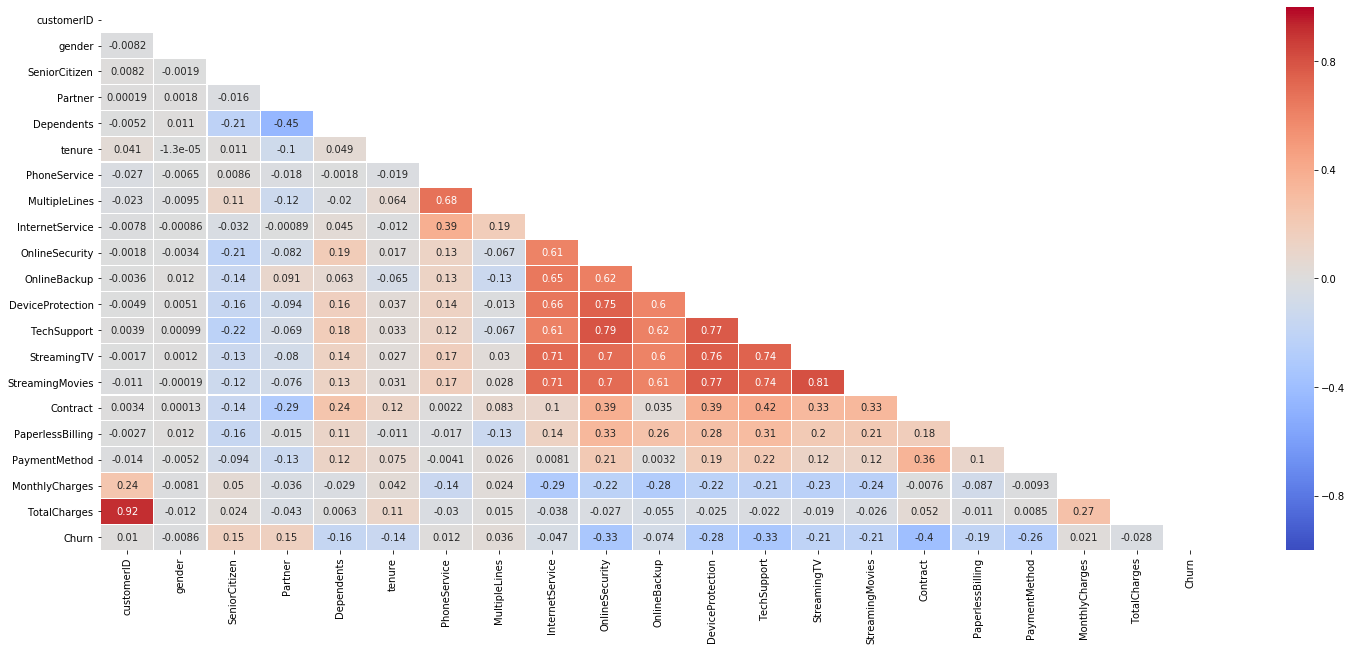

In [30]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [31]:
discrete_feature = data.drop(['customerID','Churn'],axis=1).describe(include=['object'])
discrete_feature

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11


### 3.1.3 填充缺失值

TotalCharges有少许缺失，用0填充

In [32]:
data['TotalCharges']= data['TotalCharges'].fillna(0)

In [33]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 3.1.4 离散特征向量化

由于很多特征都是字符串形式，无法直接用于机器学习建模，所以需要将这些字符串转成0,1,2...的唯一向量  
其中pandas.factorize可以将['b', 'b', 'a', 'c', 'b']转换为[1, 1, 0, 2, 1]

In [34]:
for f in discrete_feature.columns:
    data[f] = pd.factorize(data[f])[0]

In [35]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.000863,-0.003429,0.012230,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.014569,-0.012302
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.016567,0.008576,0.113791,-0.032310,-0.210897,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.220173,0.023880
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.379697,-0.017706,-0.117307,-0.000891,-0.081850,0.090753,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.096848,-0.042628
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.159712,-0.001762,-0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.113890,0.006300
tenure,0.005106,0.016567,-0.379697,0.159712,1.000000,0.008448,0.258958,-0.030359,0.145298,-0.253743,0.178649,0.144459,0.136145,0.140781,0.671607,-0.006152,0.340305,0.247900,0.100469
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,0.008448,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,0.247398,-0.029806
MultipleLines,-0.009451,0.113791,-0.117307,-0.019657,0.258958,0.675070,1.000000,0.186826,-0.066844,-0.130619,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.490700,0.015373
InternetService,-0.000863,-0.032310,-0.000891,0.044590,-0.030359,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.323260,-0.038247
OnlineSecurity,-0.003429,-0.210897,-0.081850,0.190523,0.145298,0.125353,-0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.621227,-0.026788
OnlineBackup,0.012230,-0.144828,0.090753,0.062775,-0.253743,0.129770,-0.130619,0.650962,0.621739,1.000000,0.601503,0.617003,0.604117,0.606863,0.035407,0.260715,0.003183,-0.710477,-0.054537


## 3.2 建模数据准备

### 3.2.1 构建特征数据和标签数据

customerID并不是用户特征列，在建模时可以先进行删除；Churn是标签列，由于其由No和Yes的字符串组成，所以进行0和1的替换。

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = data.drop(['customerID','Churn'],axis=1)
y = data['Churn'].replace({'No':0,'Yes':1})

### 3.2.2 分割训练测试集

按照70%和30%分割训练集和测试集

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3.3 模型构建

### 3.3.1 算法包导入

需要配置graphviz进行可视化，请参考 https://www.graphviz.org/download/ 进行安装配置，并修改第一部分graphviz_path的路径参数

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
import os
import pydotplus
from sklearn import tree
from IPython.display import Image

In [42]:
graphviz_path = r'C:\Program Files\Graphviz\bin'

In [43]:
os.environ["PATH"] += os.pathsep + graphviz_path

### 3.3.2 模型训练

训练模型，并对GBDT的树进行可视化

In [72]:
f_name = [i for i in X.columns]  # 用于后续树模型画图
gbdt = GradientBoostingClassifier(n_estimators=2,max_depth=2)
gbdt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=2,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

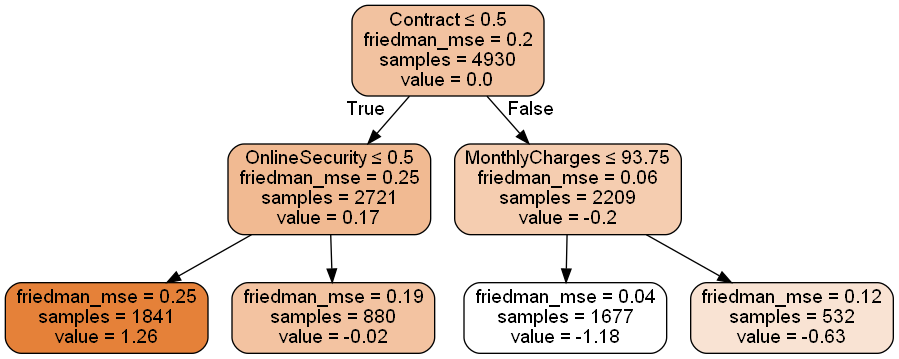

In [73]:
clf = gbdt.estimators_[0][0] 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=f_name,filled=True, rounded=True,
                                special_characters=True,proportion=False,rotate=False,precision=2)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### 3.3.3 抽取GBDT树特征并形成新特征数据

In [74]:
new_feature = pd.DataFrame(gbdt.apply(X_train).reshape(-1,2),columns=['tree1','tree2'])
new_feature.head()

,tree1,tree2
0,2.0,3.0
1,2.0,3.0
2,5.0,5.0
3,5.0,5.0
4,3.0,2.0


In [76]:
new_feature.shape

(4930, 2)

In [77]:
new_feature = pd.get_dummies(new_feature, prefix='clf', columns=new_feature.columns)  
new_feature.head()

,clf_2.0,clf_3.0,clf_5.0,clf_6.0,clf_2.0,clf_3.0,clf_5.0,clf_6.0
0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0
4,0,1,0,0,1,0,0,0


### 3.3.4 构建LR模型并评估训练集准确率

In [78]:
X_train.shape, new_feature.shape

((4930, 19), (4930, 8))

In [173]:
X_train = pd.concat([X_train.reset_index(drop=True), new_feature],axis=1)#增加特征

model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
accuracy_score(y_train,model.predict(X_train))

0.8058823529411765

### 3.3.5 对测试集准确率进行评估

In [122]:
new_feature = pd.DataFrame(gbdt.apply(X_test).reshape(-1,2),columns=['treel','tree2'])
new_feature = pd.get_dummies(new_feature,prefix='clf',columns=new_feature.columns)
X_test = pd.concat([X_test.reset_index(drop=True),new_feature],axis=1)

In [123]:
accuracy_score(y_test,model.predict(X_test))

0.8026502602934217

# 4 总结

点击率预估（CTR）首先被运用到广告推荐上，它计算用户点击广告的可能性；而在推荐系统中，推荐商品也被预测用户的兴趣度。而点击率预估最经典的算法是梯度提升树（GBDT）和逻辑回归（LR）的融合。采用某公司电信客户流失数据进行客户流失预测，通过数据清洗，数据建模，利用GBDT训练数据集形成新特征导入LR模型，最终结果显示，准确率为80.58%，可以说明效果并不理想，需要进一步调节参数。客户流失对于公司运营是一个重要隐患，需要采取策略维持客户和挽回流失客户。识别有流失风险的客户可以帮助公司改进客户满意度，通过相关体验和专业服务，以采取积极主动的方法来避免未来的客户流失。